# Convolutional Neural Networks (CIFAR 10)
In this notebook we will work with convolutional neural networks for classification using the CIFAR10 dataset


## Exercise 1 (Load the data set)
Import the digits data set (CIFAR10) and visualize 10 instances of each class. Prepare the data set so that each digit is a tensor of size $32 \times 32 \times 1$. The last component represent the number of channels. 

/opt/python-3.5.5/lib/python3.5/site-packages/h5py-2.8.0-py3.5-linux-x86_64.egg/h5py/__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.8.16, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


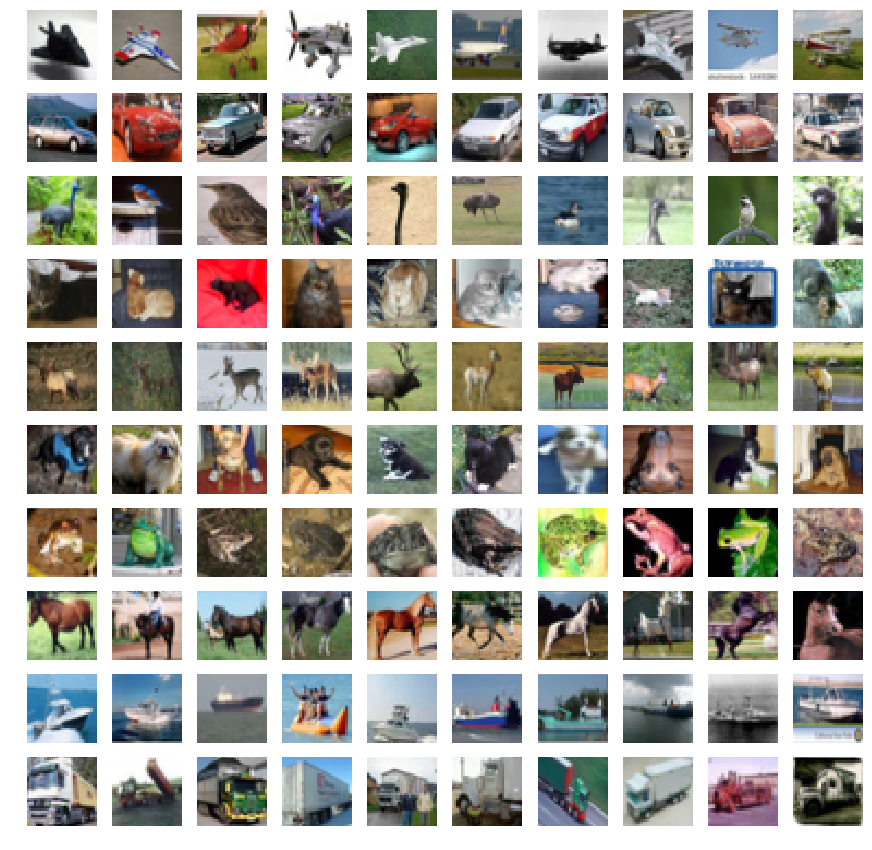

In [1]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

plt.figure(figsize=(15,15))

for i in range(10):
    for j in range(10):
        digit = x_train[(y_train==i).reshape(-1)][j]
        plt.subplot(10, 10, 10*i+j+1)
        plt.imshow(digit)
        plt.axis('off')
        

# data preparation (images should be 28 x 28 x 1 tensors)
img_rows = 32
img_cols = 32

input_shape = (img_rows, img_cols, 3)

# normalize images to have values between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# convert the y vectors to binary vectors
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Exercise 2 (Create and train a fully connected neural network)

Before we create our convolutional network we want create a standard fully connected network just like the ones we used before to classify the digits. Then we will be able to see the improvement when we use convolutions.

**a)** Create and train the network

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import adam


model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(units=100, activation='tanh'))
model.add(Dense(units=100, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer=adam(0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________


In [3]:
h = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=1, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.9265 - acc: 0.2988 - val_loss: 1.8105 - val_acc: 0.3470
Epoch 2/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7941 - acc: 0.3532 - val_loss: 1.7413 - val_acc: 0.3808
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7442 - acc: 0.3745 - val_loss: 1.6980 - val_acc: 0.3875
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7180 - acc: 0.3839 - val_loss: 1.7480 - val_acc: 0.3718
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6948 - acc: 0.3930 - val_loss: 1.6770 - val_acc: 0.3958
Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6739 - acc: 0.3998 - val_loss: 1.6659 - val_acc: 0.4080
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6631 - acc: 0.4024 - val_loss: 1.6632 - 

**b)** Plot the accuracy on the training and validation sets

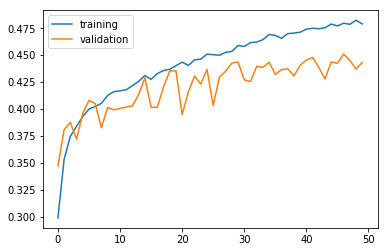

In [4]:
plt.plot(h.history['acc'], label='training')
plt.plot(h.history['val_acc'], label='validation')
plt.legend()

**c)** Create and train a convolutional neural network

In [36]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(input_shape=input_shape, filters=32, kernel_size=(5, 5), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(input_shape=input_shape, filters=64, kernel_size=(3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=adam(0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               295040    
__________

In [37]:
h2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=1, batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.5463 - acc: 0.4391 - val_loss: 1.3153 - val_acc: 0.5326
Epoch 2/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.2217 - acc: 0.5634 - val_loss: 1.1241 - val_acc: 0.6103
Epoch 3/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.0851 - acc: 0.6174 - val_loss: 0.9822 - val_acc: 0.6549
Epoch 4/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.9922 - acc: 0.6500 - val_loss: 0.9655 - val_acc: 0.6605
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.9238 - acc: 0.6742 - val_loss: 0.9462 - val_acc: 0.6687
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.8665 - acc: 0.6946 - val_loss: 0.9242 - val_acc: 0.6783
Epoch 7/50
50000/50000 [==============================] - 8s 158us/step - loss: 0.8153 - acc: 0.7128 - val_loss: 0.8923 - 

**d)** Plot the accuracy on the training and validation sets and compare it to the results from the fully connected network.

(0, 1)

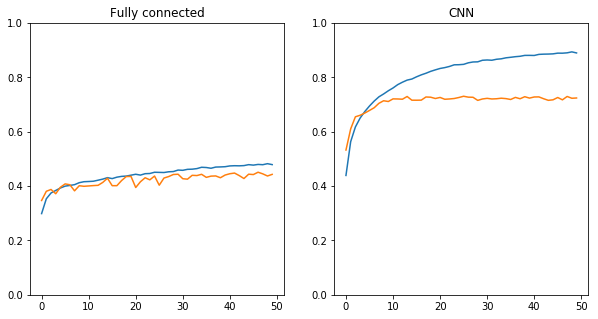

In [38]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2 , 1)
plt.plot(h.history['acc'], label='training')
plt.plot(h.history['val_acc'], label='validation')
plt.ylim([0,1])
plt.title('Fully connected')

plt.subplot(1, 2 , 2)
plt.title('CNN')
plt.plot(h2.history['acc'], label='training')
plt.plot(h2.history['val_acc'], label='validation')
plt.ylim([0,1])

## Confussion matrix

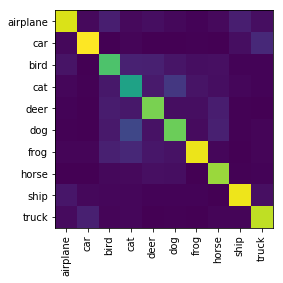

In [39]:
names=["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_pred = model.predict(x_test)
labels_pred = np.argmax(y_pred, axis=-1).squeeze()
labels_true = np.argmax(y_test, axis=-1).squeeze()

matrix = np.zeros(shape=(10,10))
for i in range(x_test.shape[0]):
    matrix[labels_pred[i]][labels_true[i]] += 1 

plt.imshow(matrix)
plt.xticks(range(10), names, rotation='vertical');
plt.yticks(range(10), names);

## Prediction examples

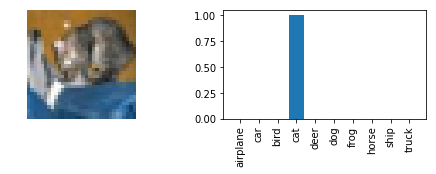

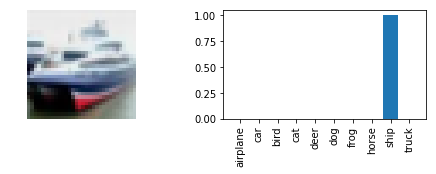

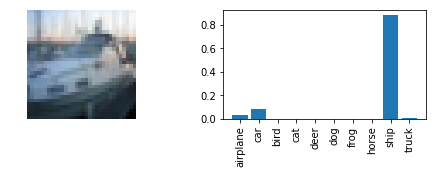

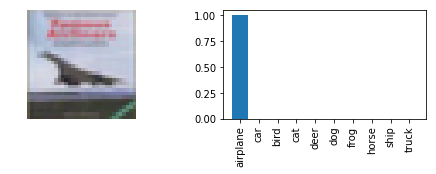

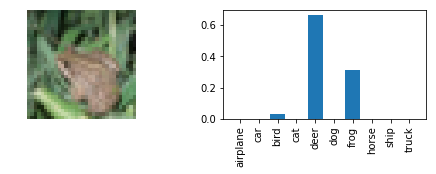

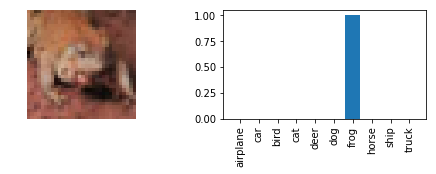

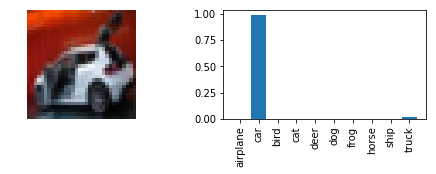

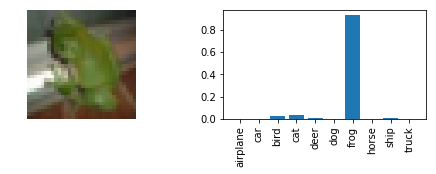

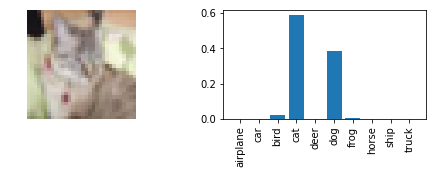

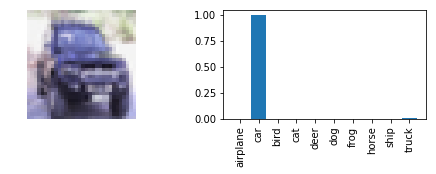

In [40]:
for i in range(10):
    plt.figure(figsize=(8,2))
    test_image = x_test[i].reshape(1, 32, 32, 3)
    
    plt.subplot(1,2,1)
    plt.imshow(test_image.squeeze())
    plt.axis('off')

    plt.subplot(1,2,2)

    p = model.predict(test_image).squeeze()
    plt.bar(range(len(p)), p)
    plt.xticks(range(len(p)), names, rotation='vertical')
    plt.show()

## Visualizing intermediate results

(1, 28, 28, 32)
(1, 14, 14, 32)
(1, 12, 12, 64)
(1, 6, 6, 64)
(1, 6, 6, 64)
(1, 2304)
(1, 128)
(1, 128)
(1, 10)


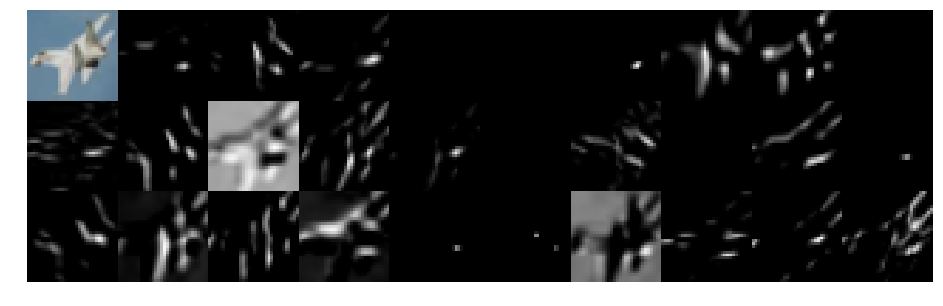

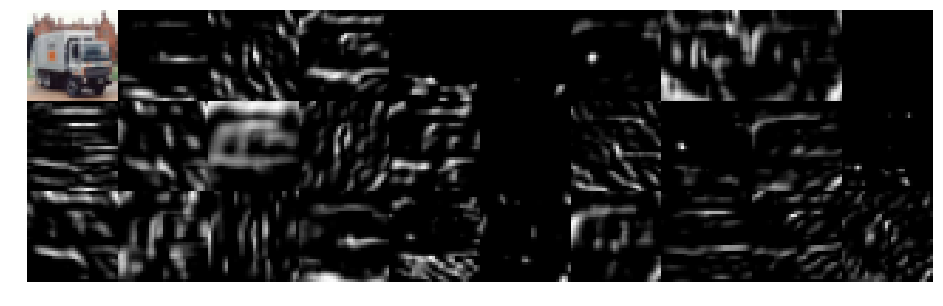

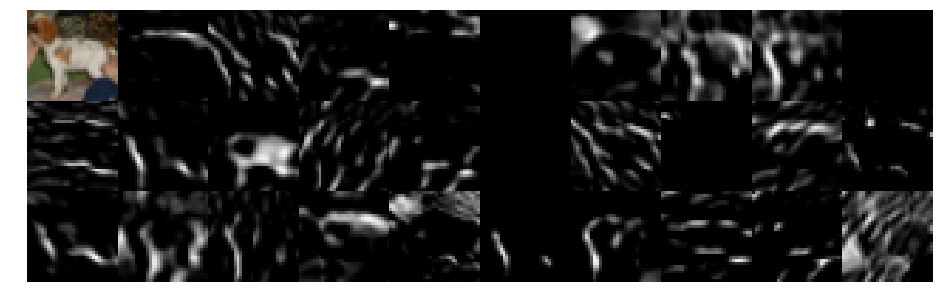

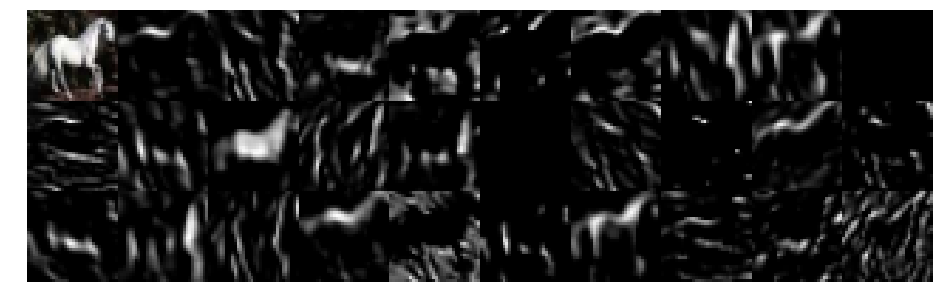

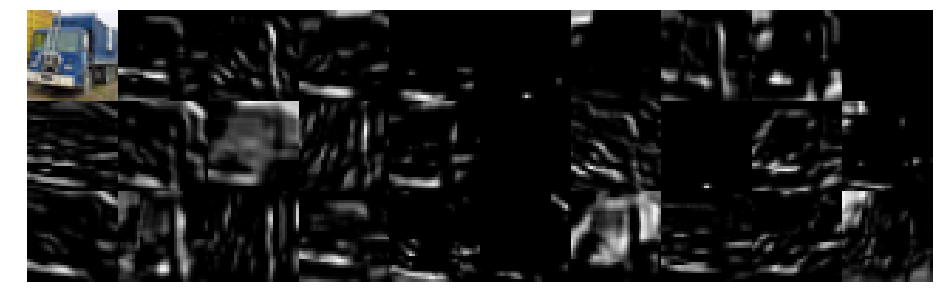

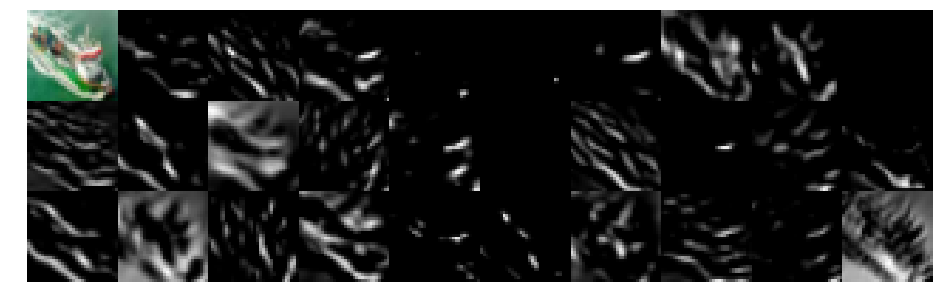

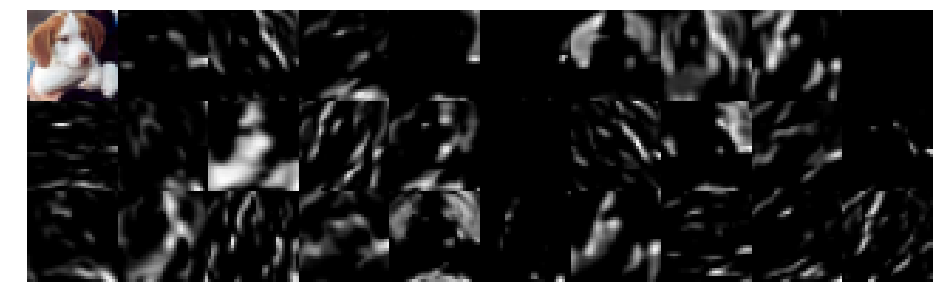

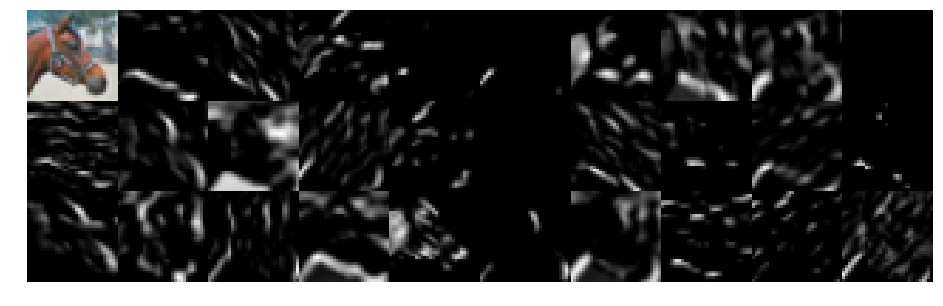

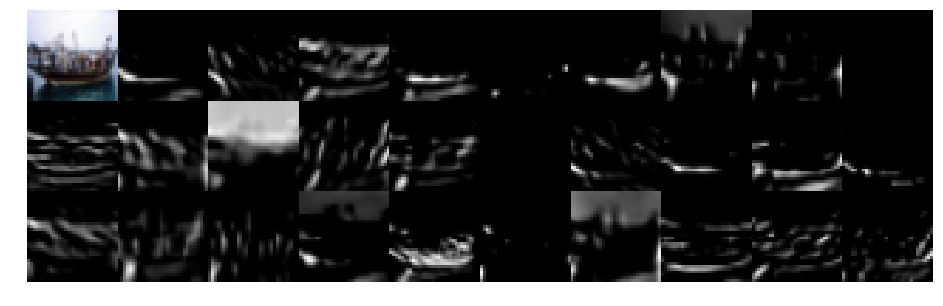

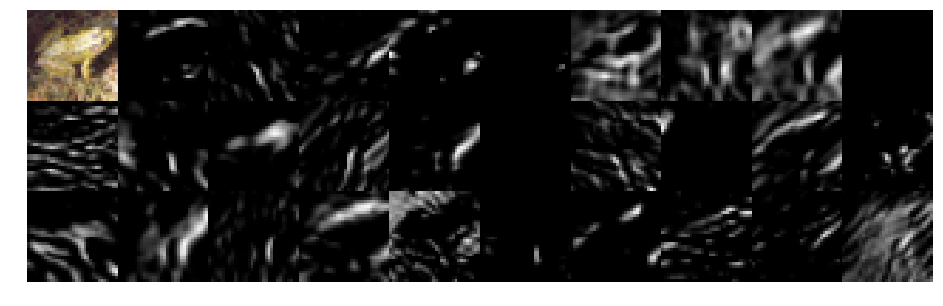

In [41]:
from keras.models import Model
from skimage.transform import resize

from keras.models import Model

for i in range(len(model.layers)):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[i].output)
    intermediate_output = intermediate_layer_model.predict(test_image)
    print(intermediate_output.shape)

intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[0].output)

for i in range(10, 20):
    test_image = x_test[i].reshape(1, 32, 32, 3)
    
    intermediate_output = intermediate_layer_model.predict(test_image)
    activation = test_image.squeeze()
    shape = activation.shape
    
    rows = []
    for j in range(1, 31):
        output = intermediate_output[0,:,:,j-1]
        output = resize(output / (np.max(np.abs(output)) + 0.00001), output_shape=shape, anti_aliasing=True, mode ='reflect')
        if activation is not None:
            activation = np.concatenate([activation, output], axis=1)
        else:
            activation = output
        
        if (j+1) % 10 == 0:
            rows += [activation]
            activation = None
    
    plt.figure(figsize=(20,5))    
    plt.imshow(np.concatenate(rows))
    plt.axis('off')
    plt.show()   

## Visualizing filters

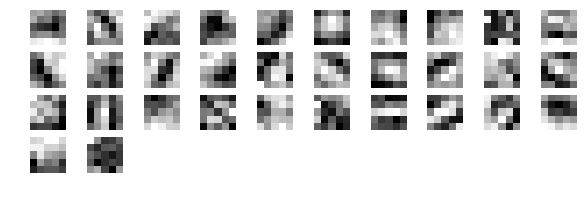

In [54]:

intermediate_layer_model = Model(inputs=model.input, outputs=model.layers[0].output)

    
intermediate_output = intermediate_layer_model.get_weights()
plt.figure(figsize=(10,3))
for i in range(intermediate_output[0].shape[3]):
    plt.subplot(intermediate_output[0].shape[3]/10+1, 10, i+1)
    img = intermediate_output[0][:,:,0,i]
    img = img - np.min(img)
    plt.imshow(img/np.max(np.abs(img)), cmap='gray')
    plt.axis("off")
plt.show()